In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the cleaned dataset

In [4]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)


df = pd.read_csv(r'C:\Users\Deepika Hegde\customer_sales_forecasting\data\cleaned.csv',parse_dates=["InvoiceDate"])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotlalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Summary

In [5]:
print("Total transactions:", df['InvoiceNo'].nunique())
print("Total customers:", df['CustomerID'].nunique())
print("Totlal revenue: £", round(df['TotlalPrice'].sum(), 2))
print("Date range:", df['InvoiceDate'].min(), "→", df['InvoiceDate'].max())


Total transactions: 18532
Total customers: 4338
Totlal revenue: £ 8887208.89
Date range: 2010-12-01 08:26:00 → 2011-12-09 12:50:00


### Monthly Revenue Tread

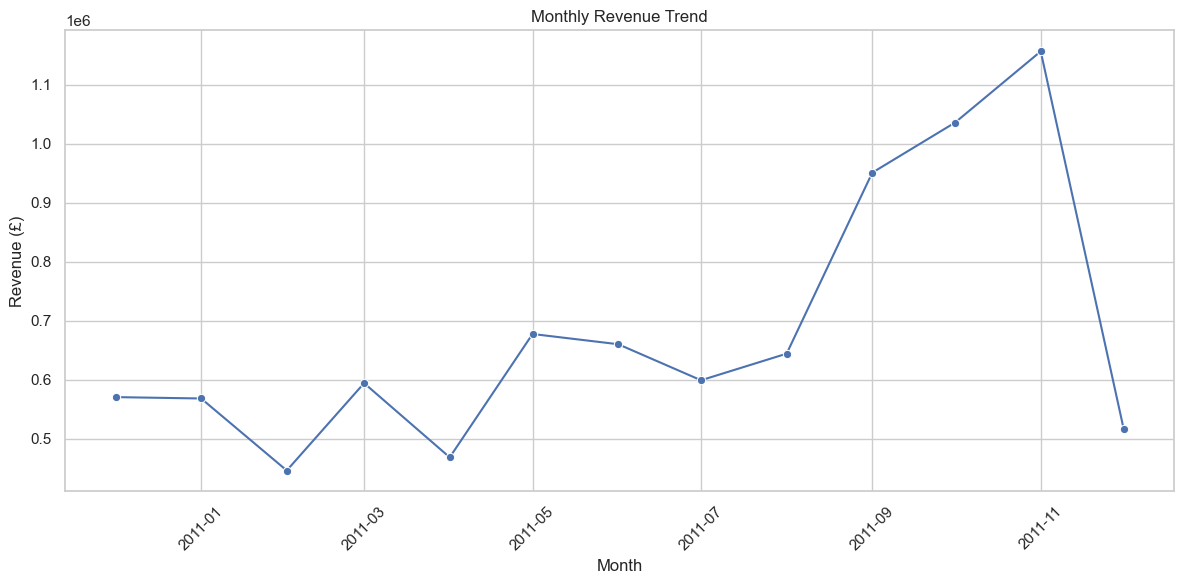

In [6]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('InvoiceMonth')['TotlalPrice'].sum().reset_index()

monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

# Plot
sns.lineplot(data=monthly_revenue, x='InvoiceMonth', y='TotlalPrice', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (£)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 Countries by Revenue (Excluding UK)

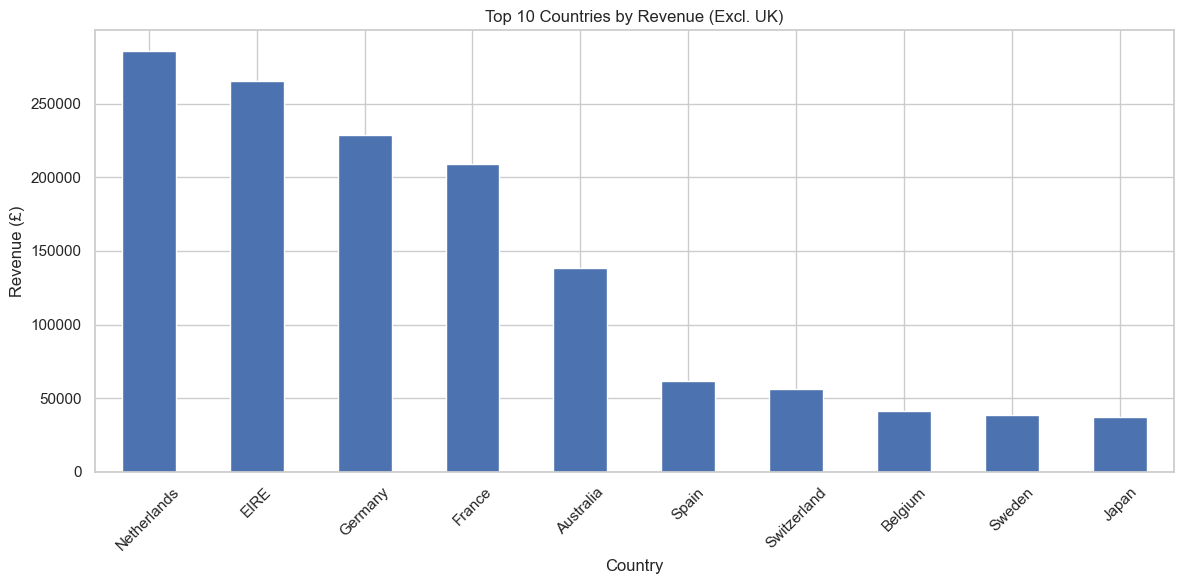

In [7]:
country_rev = df.groupby('Country')['TotlalPrice'].sum().sort_values(ascending=False).drop('United Kingdom').head(10)

country_rev.plot(kind='bar')
plt.title('Top 10 Countries by Revenue (Excl. UK)')
plt.ylabel('Revenue (£)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 10 Best-Selling Products

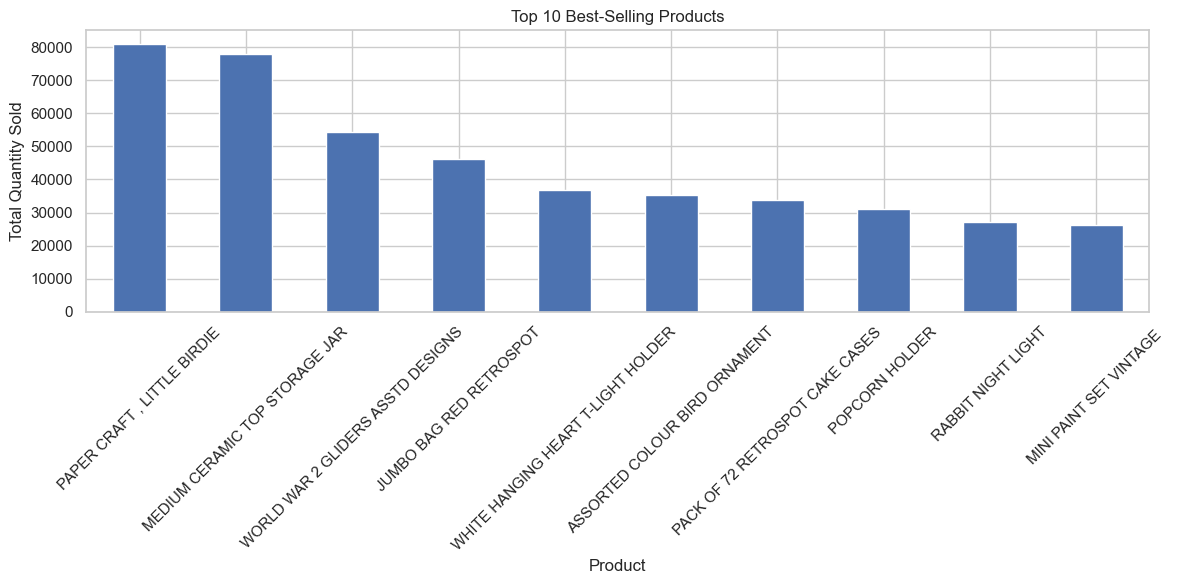

In [8]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Orders by Day of Week

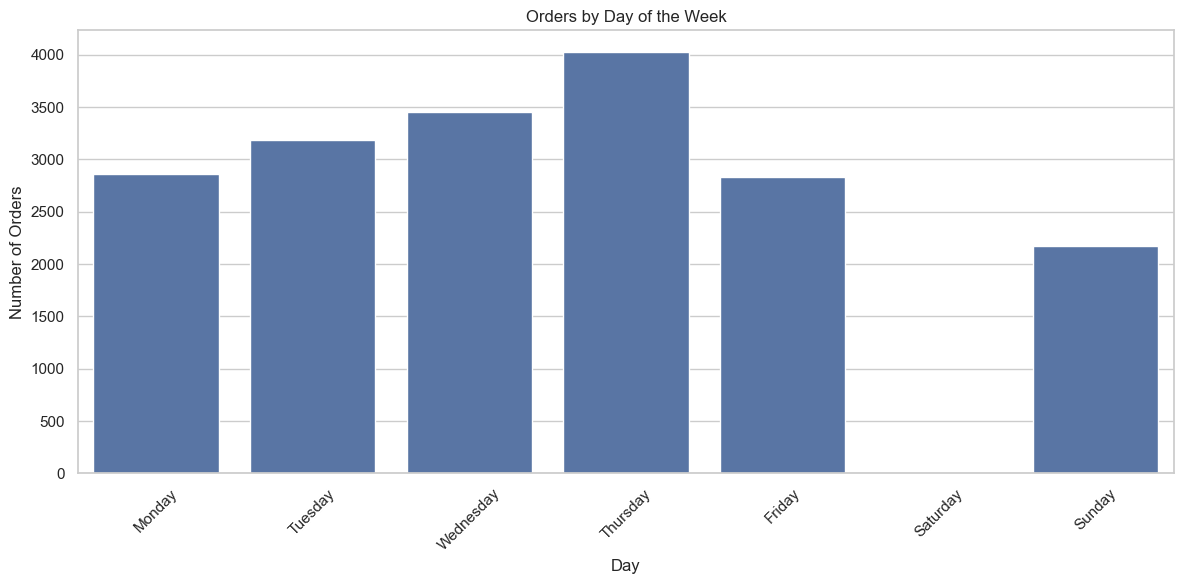

In [9]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

day_orders = df.groupby('DayOfWeek')['InvoiceNo'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.barplot(x=day_orders.index, y=day_orders.values)
plt.title('Orders by Day of the Week')
plt.ylabel('Number of Orders')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Hourly Sales Trend

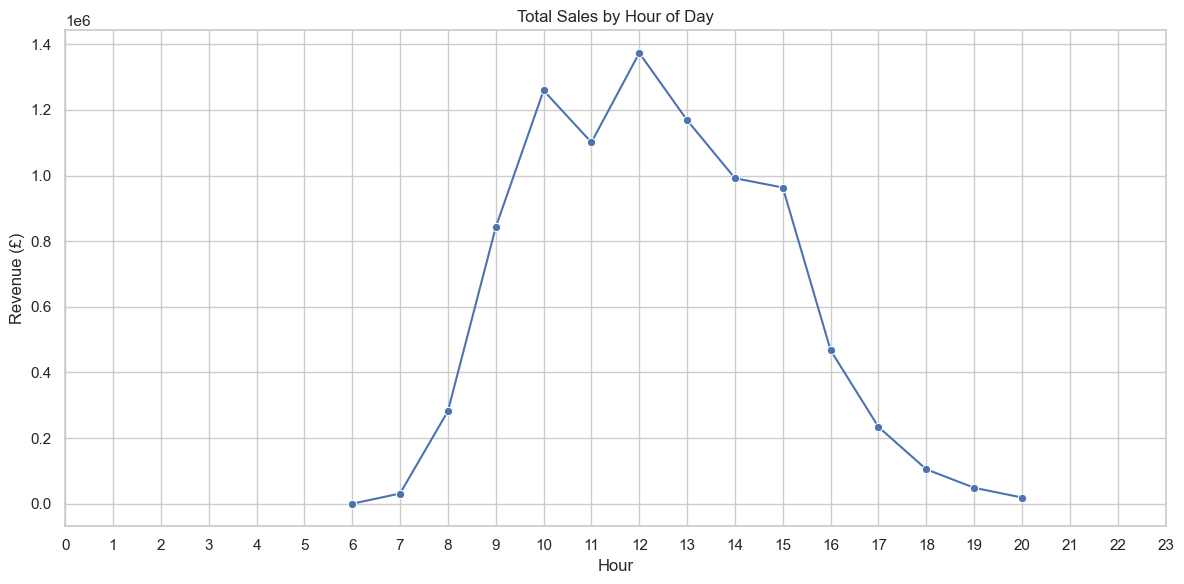

In [10]:
df["Hour"] = df["InvoiceDate"].dt.hour
hourly_sales = df.groupby("Hour")["TotlalPrice"].sum()

sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue (£)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()